In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import pickle
import math
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import pydot
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn import metrics
from sklearn.metrics import classification_report
from keras import layers
from google.colab import drive
import plotly.graph_objs as go
import plotly.offline as pyo
from keras.models import Sequential
from keras.layers import Dense
from imblearn.combine import SMOTEENN

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


# IMPORTACIÓN DE LA BASE DE DATOS (Prima Indians Diabetes)

## EN GOOGLE COLAB

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Codigo-TFM/data/diabetes.csv')

## EN JUPYTER NOTEBOOK

In [ ]:
df = pd.read_csv('../data/diabetes.csv', sep=',', encoding="latin-1")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# ANALISIS VARIABLES

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


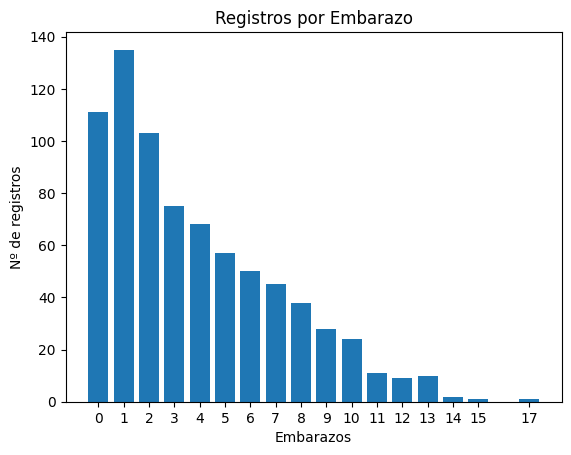

In [ ]:
labels, counts = np.unique(df['Pregnancies'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.title('Registros por Embarazo')
plt.xlabel('Embarazos')
plt.ylabel('Nº de registros')
plt.gca().set_xticks(labels)
plt.rcParams["figure.figsize"] = (12,5)
plt.show()

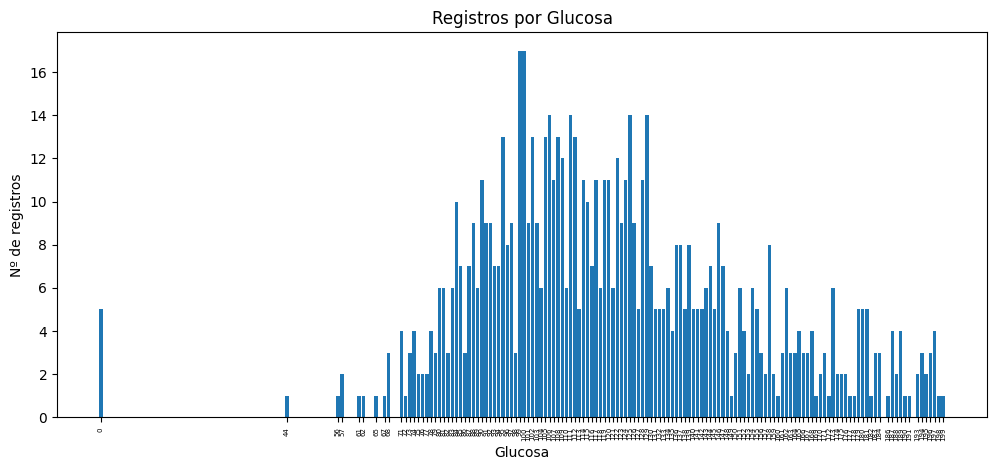

In [ ]:
labels, counts = np.unique(df['Glucose'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.title('Registros por Glucosa')
plt.xlabel('Glucosa')
plt.ylabel('Nº de registros')

plt.gca().set_xticks(labels)
plt.gca().set_xticklabels(labels, rotation=90, fontsize=5)

plt.rcParams["figure.figsize"] = (12, 5)
plt.show()


Se considera que tener 0 mg/dL de glucosa en sangre es imposible, al nivel de azúcar en la sangre por debajo de los 70 mg/dL se lo considera bajo.

Por tanto se eliminan los registros cuyo valor de glucosa en sangre sea 0.

In [ ]:
# select the rows that match the condition
condition = df['Glucose'] == 0
rows_to_delete = df[condition]

# delete the selected rows from the DataFrame
df = df.drop(rows_to_delete.index)

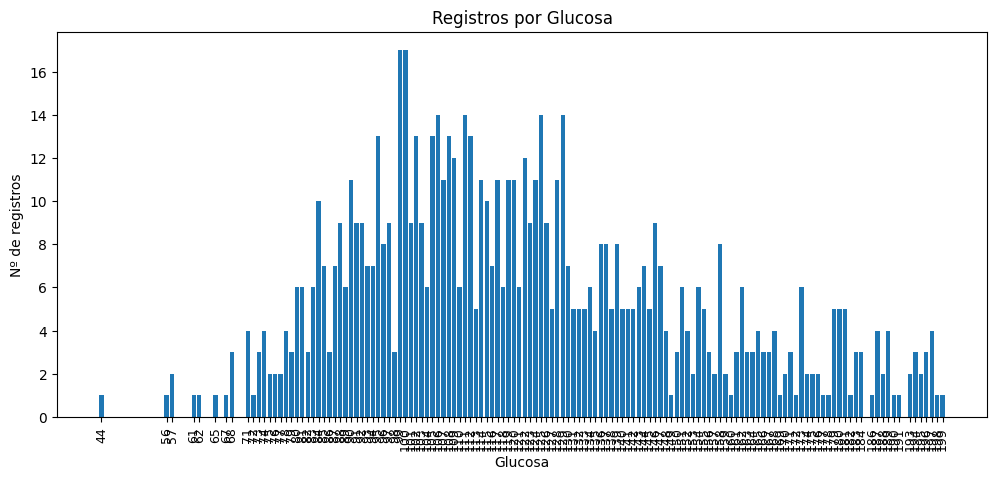

In [ ]:
labels, counts = np.unique(df['Glucose'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.title('Registros por Glucosa')
plt.xlabel('Glucosa')
plt.ylabel('Nº de registros')
plt.gca().set_xticks(labels)
plt.xticks(fontsize=9)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (18,5)
plt.show()

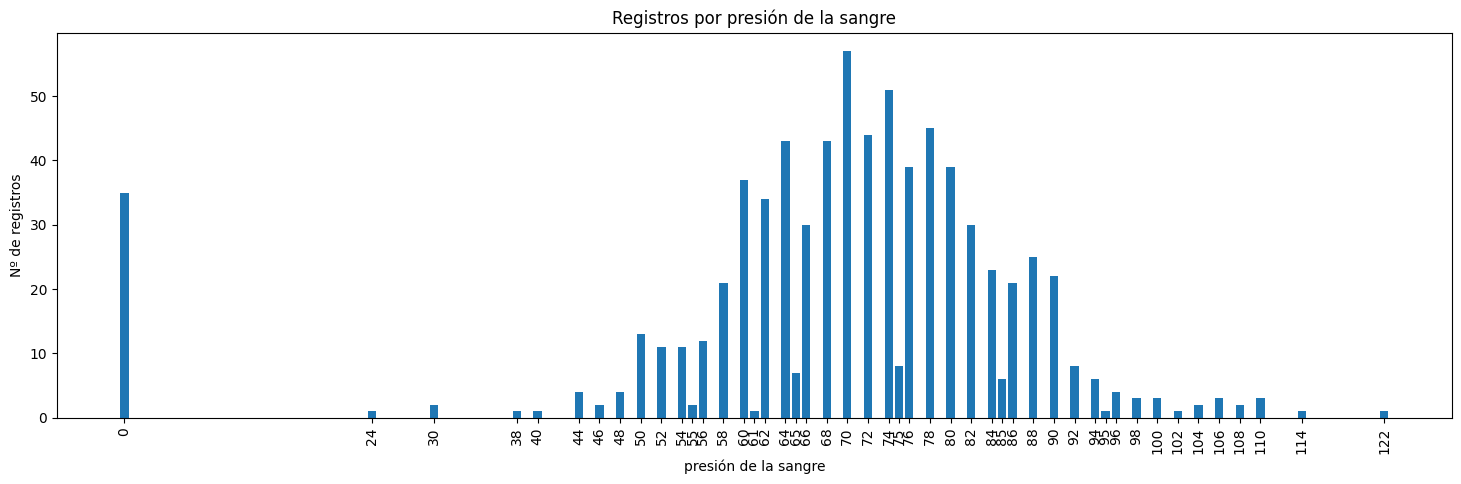

In [ ]:
labels, counts = np.unique(df['BloodPressure'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.title('Registros por presión de la sangre')
plt.xlabel('presión de la sangre')
plt.ylabel('Nº de registros')
plt.gca().set_xticks(labels)
plt.xticks(fontsize=10)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (18,5)
plt.show()

In [ ]:
# select the rows that match the condition
condition = df['BloodPressure'] == 0
rows_to_delete = df[condition]

# delete the selected rows from the DataFrame
df = df.drop(rows_to_delete.index)

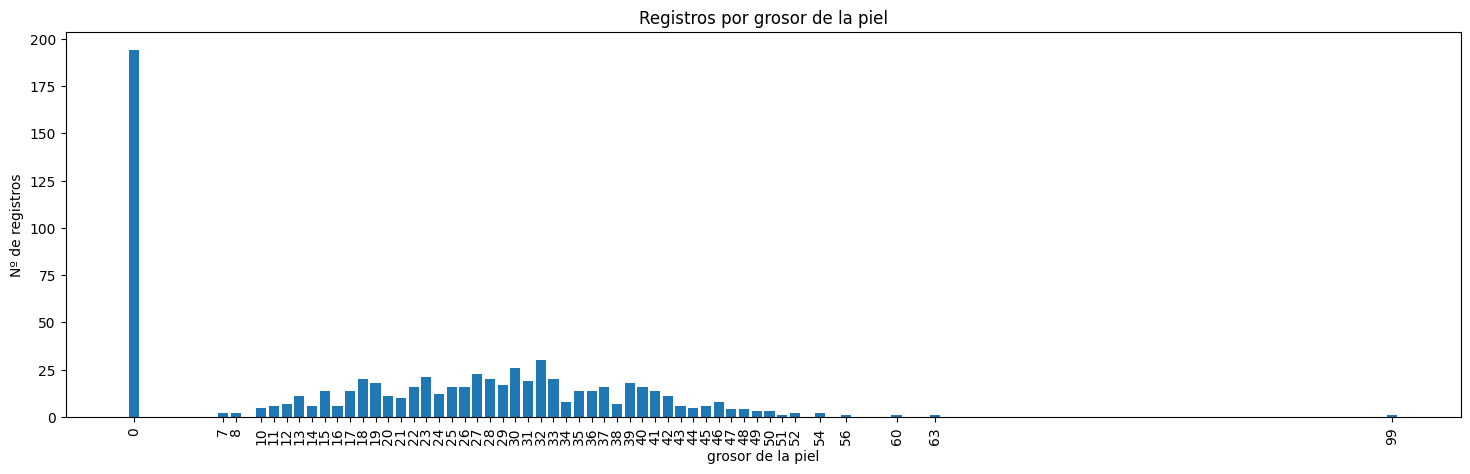

In [ ]:
labels, counts = np.unique(df['SkinThickness'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.title('Registros por grosor de la piel')
plt.xlabel('grosor de la piel')
plt.ylabel('Nº de registros')
plt.gca().set_xticks(labels)
plt.xticks(fontsize=10)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (18,5)
plt.show()

El grosor de la piel no puede ser 0, ya que la epidermis de la piel delgada varía de 0,07 a 0,15 milímetros (mm), por lo tanto, se eliminan los registros que contengan 0 como grosor de piel.

In [ ]:
# select the rows that match the condition
condition = df['SkinThickness'] == 0
rows_to_delete = df[condition]

# delete the selected rows from the DataFrame
df = df.drop(rows_to_delete.index)

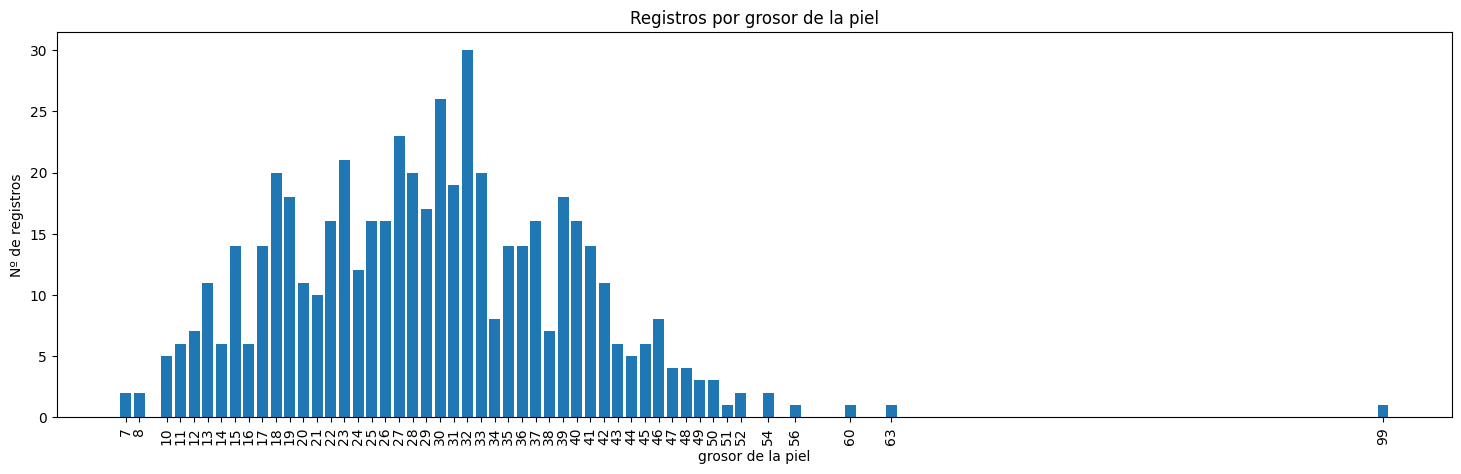

In [ ]:
labels, counts = np.unique(df['SkinThickness'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.title('Registros por grosor de la piel')
plt.xlabel('grosor de la piel')
plt.ylabel('Nº de registros')
plt.gca().set_xticks(labels)
plt.xticks(fontsize=10)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (18,5)
plt.show()

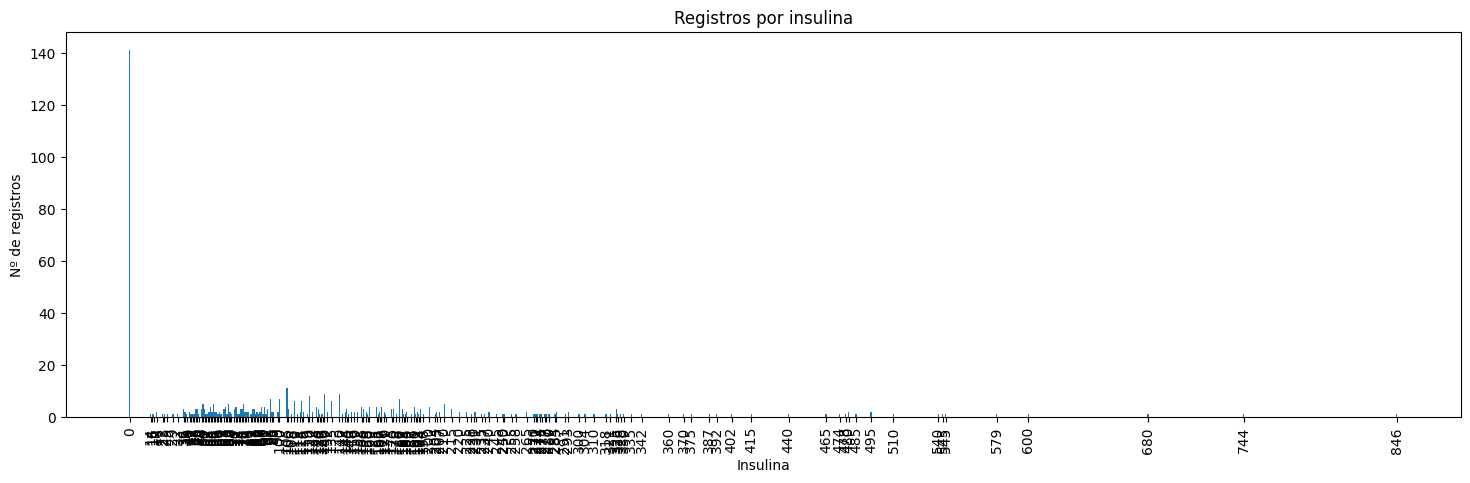

In [ ]:
labels, counts = np.unique(df['Insulin'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.title('Registros por insulina')
plt.xlabel('Insulina')
plt.ylabel('Nº de registros')
plt.gca().set_xticks(labels)
plt.xticks(fontsize=10)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (18,5)
plt.show()

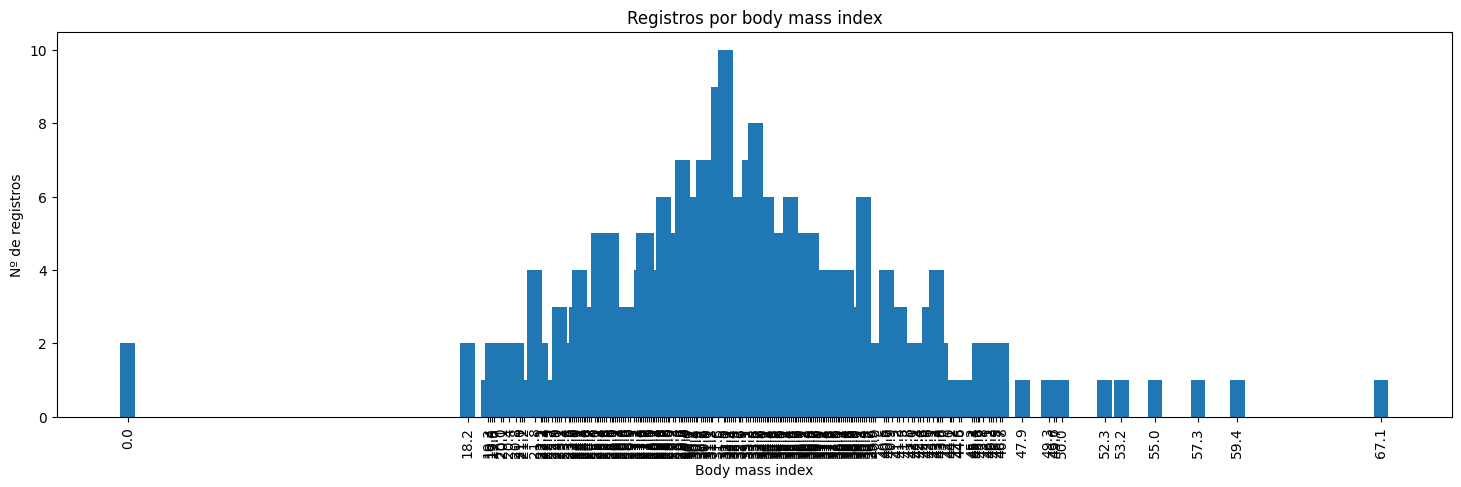

In [ ]:
labels, counts = np.unique(df['BMI'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.title('Registros por body mass index')
plt.xlabel('Body mass index')
plt.ylabel('Nº de registros')
plt.gca().set_xticks(labels)
plt.xticks(fontsize=10)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (18,5)
plt.show()

Es imposible que el indice de masa corporal sea 0, ya que el IMC más bajo informado fue de solo 6,7 kg/m², por tanto, se eliminan los registros con valores de 0 en el IMC.

In [ ]:
# select the rows that match the condition
condition = df['BMI'] == 0
rows_to_delete = df[condition]

# delete the selected rows from the DataFrame
df = df.drop(rows_to_delete.index)

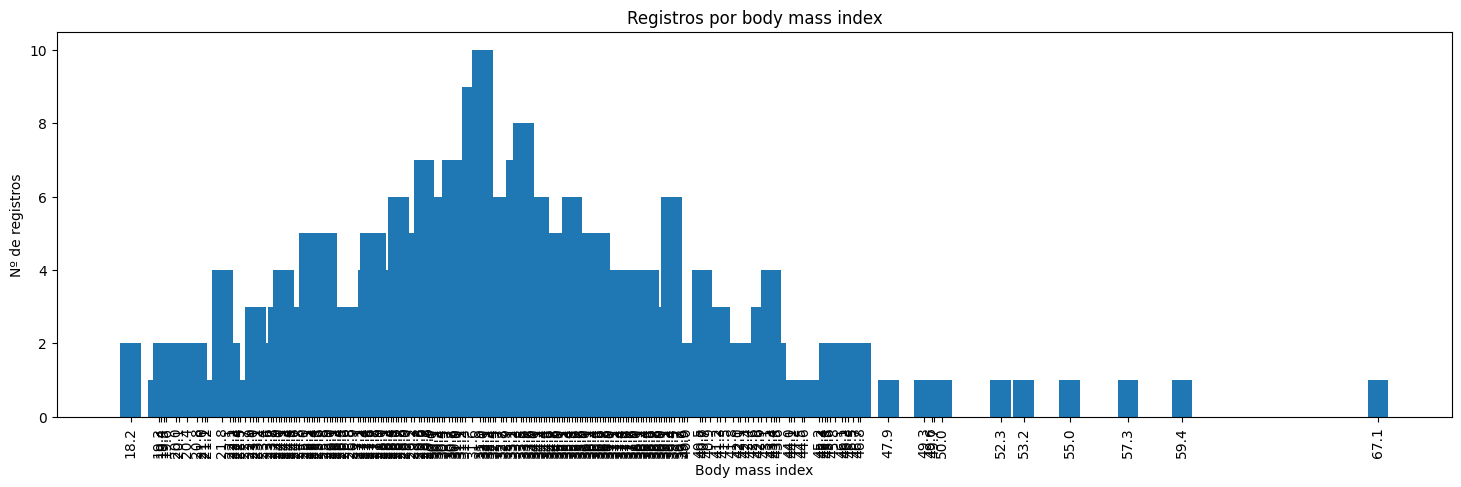

In [ ]:
labels, counts = np.unique(df['BMI'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.title('Registros por body mass index')
plt.xlabel('Body mass index')
plt.ylabel('Nº de registros')
plt.gca().set_xticks(labels)
plt.xticks(fontsize=10)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (18,5)
plt.show()

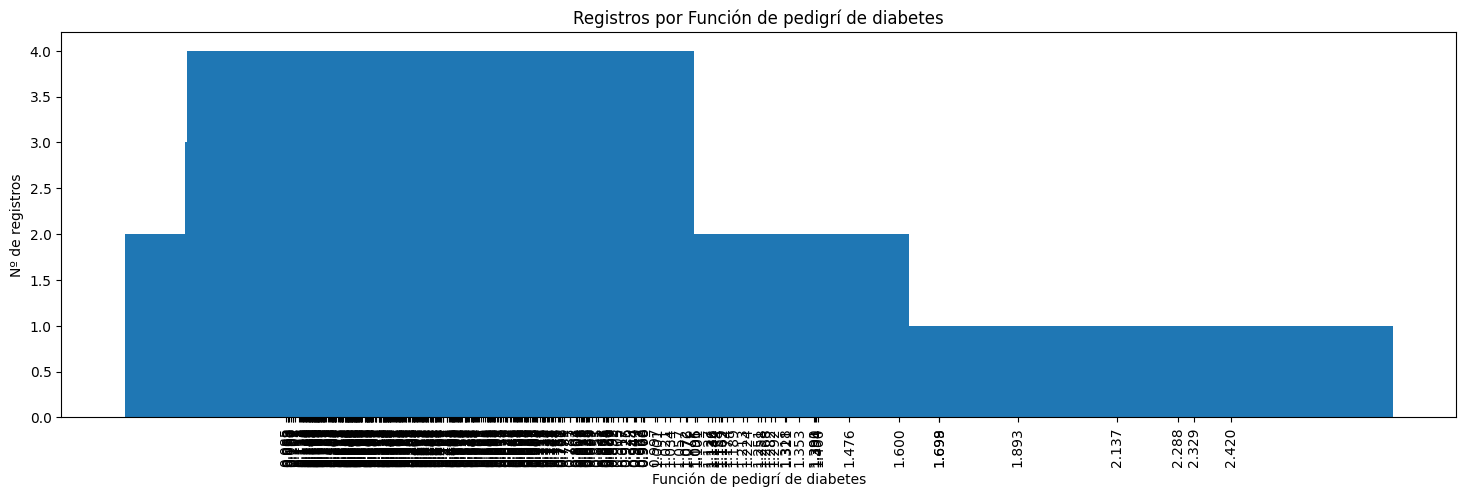

In [ ]:
labels, counts = np.unique(df['DiabetesPedigreeFunction'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.title('Registros por Función de pedigrí de diabetes')
plt.xlabel('Función de pedigrí de diabetes')
plt.ylabel('Nº de registros')
plt.gca().set_xticks(labels)
plt.xticks(fontsize=10)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (18,5)
plt.show()

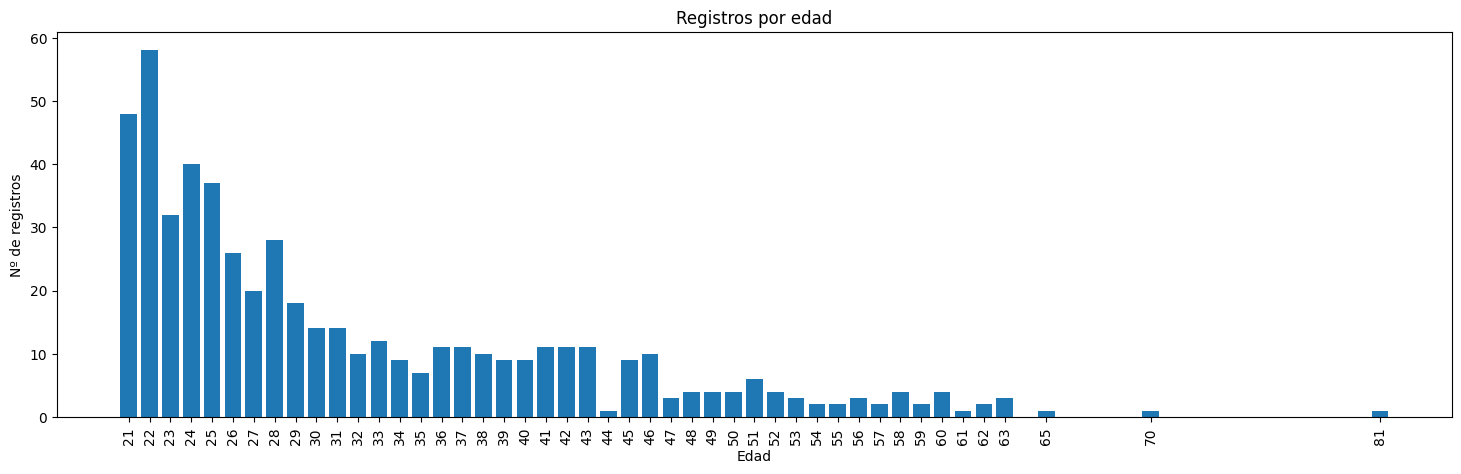

In [ ]:
labels, counts = np.unique(df['Age'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.title('Registros por edad')
plt.xlabel('Edad')
plt.ylabel('Nº de registros')
plt.gca().set_xticks(labels)
plt.xticks(fontsize=10)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (18,5)
plt.show()

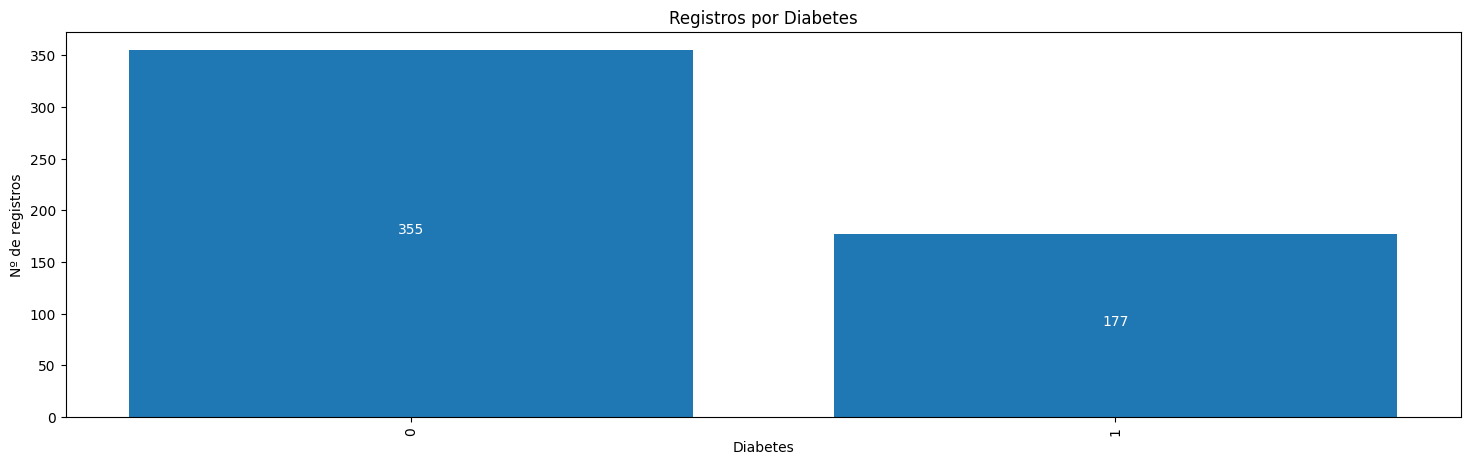

In [ ]:
labels, counts = np.unique(df['Outcome'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.title('Registros por Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Nº de registros')
plt.text(1, counts[1]/2, counts[1], ha='center', color='white')
plt.text(0, counts[0]/2, counts[0], ha='center', color='white')
plt.gca().set_xticks(labels)
plt.xticks(fontsize=10)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

[Text(0.5, 0, 'Pregnancies'),
 Text(1.5, 0, 'Glucose'),
 Text(2.5, 0, 'BloodPressure'),
 Text(3.5, 0, 'SkinThickness'),
 Text(4.5, 0, 'Insulin'),
 Text(5.5, 0, 'BMI'),
 Text(6.5, 0, 'DiabetesPedigreeFunction'),
 Text(7.5, 0, 'Age'),
 Text(8.5, 0, 'Outcome')]

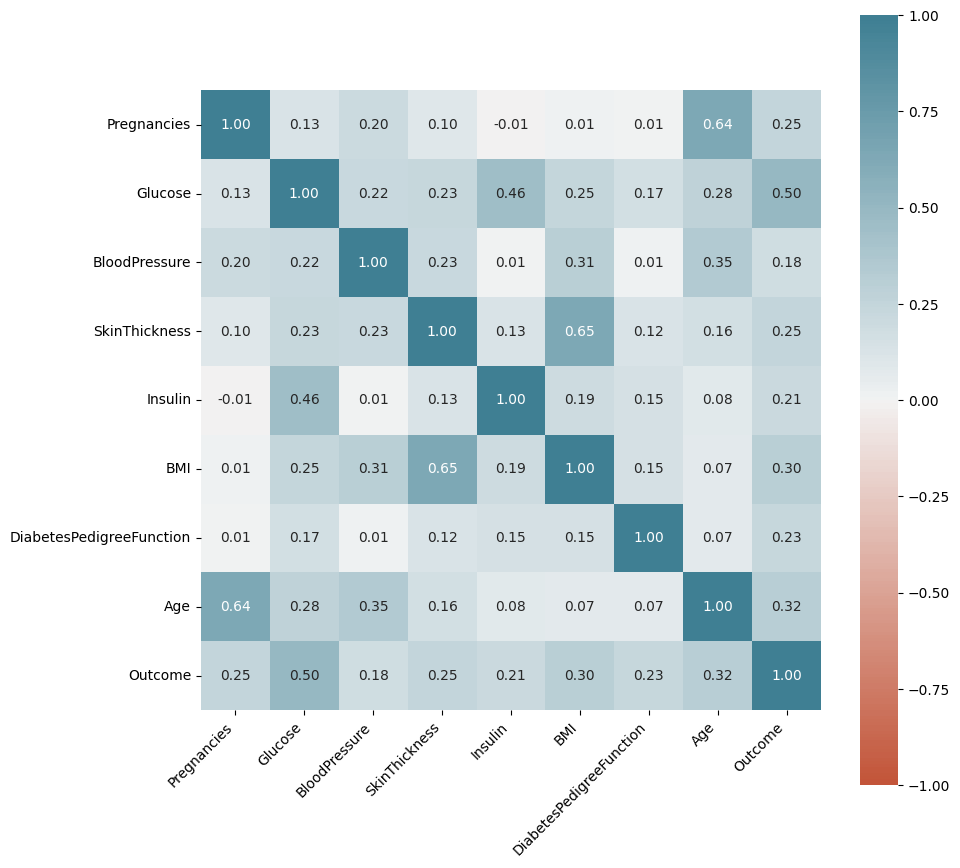

In [ ]:
# Calcula coeficiente de correlación de Pearson
corr = df.corr(method ='pearson') #por defecto Pearson ¿existe relación lineal entre variables?

plt.figure(figsize=(10,10))
ax = sns.heatmap(
 corr,
 vmin=-1, vmax=1, center=0,
 cmap=sns.diverging_palette(20, 220, n=200),
 square=True, annot=True, fmt=".2f"
)

# Rota las etiquetas del eje horizontal
ax.set_xticklabels(
 ax.get_xticklabels(),
 rotation=45,
 horizontalalignment='right'
)

In [ ]:
df = df.drop(columns=['Pregnancies', 'SkinThickness'])

[Text(0.5, 0, 'Glucose'),
 Text(1.5, 0, 'BloodPressure'),
 Text(2.5, 0, 'Insulin'),
 Text(3.5, 0, 'BMI'),
 Text(4.5, 0, 'DiabetesPedigreeFunction'),
 Text(5.5, 0, 'Age'),
 Text(6.5, 0, 'Outcome')]

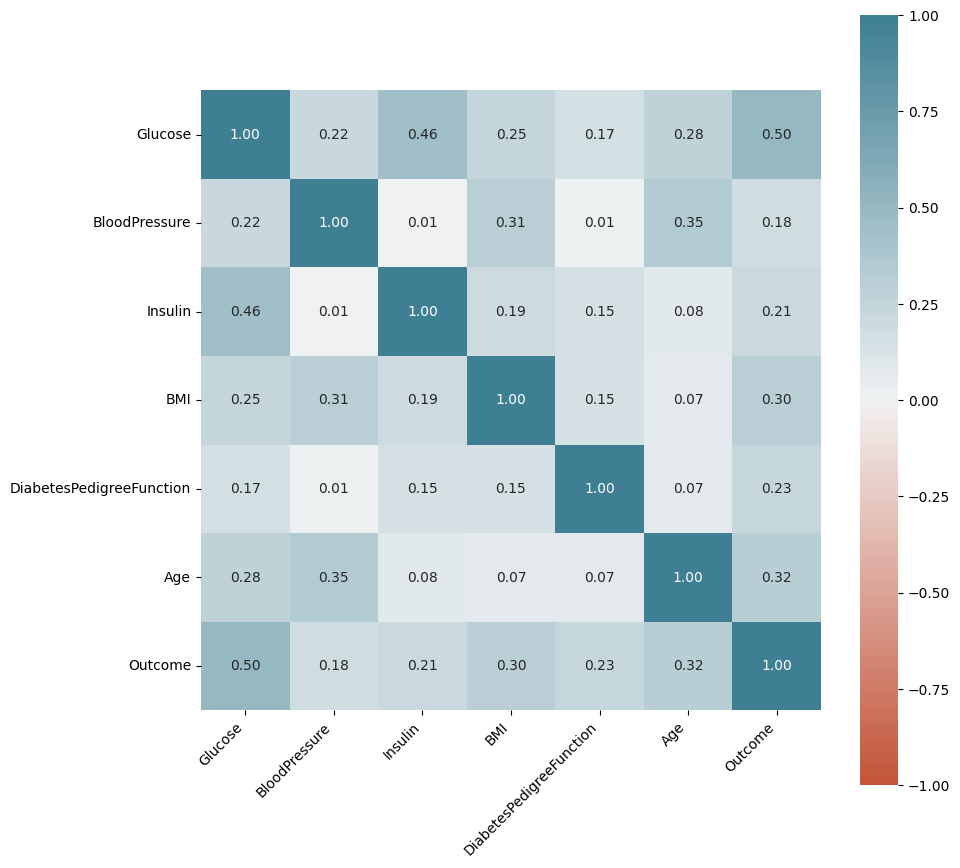

In [ ]:
# Calcula coeficiente de correlación de Pearson
corr = df.corr(method ='pearson') #por defecto Pearson ¿existe relación lineal entre variables?

plt.figure(figsize=(10,10))
ax = sns.heatmap(
 corr,
 vmin=-1, vmax=1, center=0,
 cmap=sns.diverging_palette(20, 220, n=200),
 square=True, annot=True, fmt=".2f"
)

# Rota las etiquetas del eje horizontal
ax.set_xticklabels(
 ax.get_xticklabels(),
 rotation=45,
 horizontalalignment='right'
)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   532 non-null    int64  
 1   BloodPressure             532 non-null    int64  
 2   Insulin                   532 non-null    int64  
 3   BMI                       532 non-null    float64
 4   DiabetesPedigreeFunction  532 non-null    float64
 5   Age                       532 non-null    int64  
 6   Outcome                   532 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 33.2 KB


In [ ]:
df['Outcome'].value_counts()

0    355
1    177
Name: Outcome, dtype: int64

No hay valores nulos

# NORMALIZACIÓN DE VARIABLES

In [ ]:
df_copy = df.copy()  # Hacer una copia del DataFrame original
df_val = df_copy.iloc[:10]  # Extraer los primeros 5 registros
df_copy = df_copy.iloc[10:]  # Eliminar los primeros 5 registros de la copia del DataFrame

In [ ]:
df_val['Outcome'].value_counts()

1    7
0    3
Name: Outcome, dtype: int64

In [ ]:
mm = StandardScaler()
df_scaler = mm.fit_transform(df_copy)
scaler_df = pd.DataFrame(df_scaler, index=df_copy.index, columns=df_copy.columns)
scaler_df = scaler_df.drop(columns=['Outcome'])
scaler_df

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
19,-0.190128,-0.140614,-0.143454,0.251404,0.080182,0.049020
20,0.168047,1.342223,1.034668,0.935592,0.598997,-0.419634
23,-0.059883,0.683184,-0.957120,-0.563798,-0.708417,-0.232172
24,0.721590,1.836502,0.280331,0.542548,-0.735099,1.829907
25,0.135485,-0.140614,0.017585,-0.258097,-0.880367,0.892598
...,...,...,...,...,...,...
761,1.600746,0.188905,-0.957120,1.619780,-0.293365,1.080060
763,-0.645987,0.353665,0.568505,0.003932,-0.981165,2.954678
764,0.037801,-0.140614,-0.957120,0.571663,-0.480138,-0.419634
765,0.005240,0.024146,-0.007842,-0.971400,-0.761781,-0.138442


In [ ]:
scaler_df=scaler_df.reset_index(drop=True)

In [ ]:
X = scaler_df.copy()
y = df_copy.Outcome

In [ ]:
smoteenn = SMOTEENN(random_state=2)
X_resampled, y_resampled = smoteenn.fit_resample(X, y)

In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=1)

In [ ]:
print(len(X_train_1))
print(len(X_test_1))

286
123


## DEFINICIÓN DE LA FUNCIÓN PARA CREAR GRÁFICOS DINÁMICOS

In [ ]:
def goplot(df):
  fig = go.Figure()
  fig.update_layout(autosize=False,width=1500,height=500,margin=dict(l=10,r=10,b=10,t=10,pad=4))
  for column in df.columns:
    fig.add_trace(go.Scatter(x=df.index, y=df[column], name=column))
  fig.update_layout(showlegend = True)
  fig.show()

# XGBOOST RANDOM SEARCH

Accuracy de XGBoost:  0.959349593495935
Training set score: 0.9999
Test set score: 0.9919
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        47
           1       0.96      0.97      0.97        76

    accuracy                           0.96       123
   macro avg       0.96      0.95      0.96       123
weighted avg       0.96      0.96      0.96       123



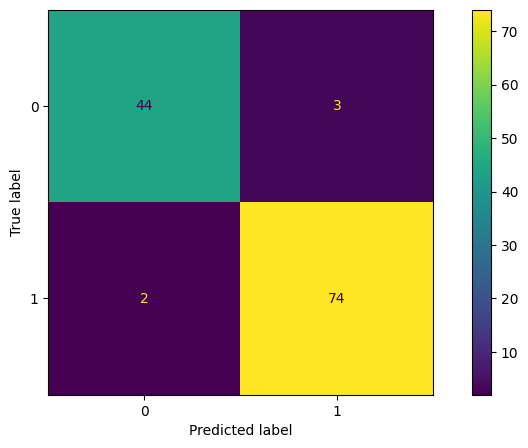

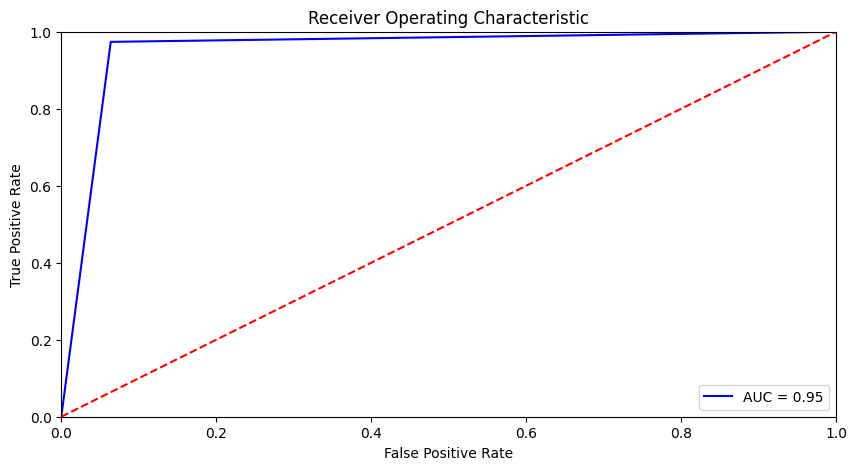

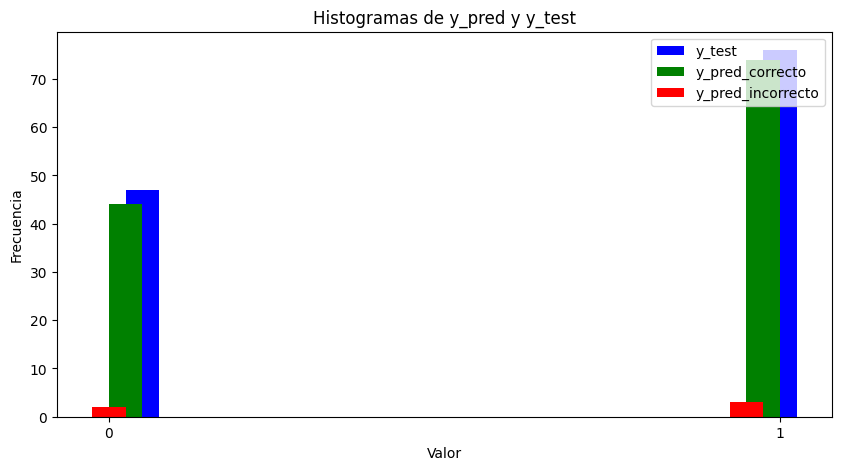

In [ ]:
params = {
    'learning_rate': np.arange(0.01, 0.1, 0.01),
    'max_depth': np.arange(3, 10, 1),
    'n_estimators': np.arange(100, 1000, 100),
    'subsample': np.arange(0.5, 1.0, 0.1),
    'colsample_bytree': np.arange(0.5, 1.0, 0.1),
    'reg_alpha': np.arange(0.0, 1.0, 0.1),
    'reg_lambda': np.arange(0.0, 1.0, 0.1),
    'gamma': np.arange(0.0, 5, 0.2),
    'min_child_weight': np.arange(1, 10, 2),
    'scale_pos_weight': np.arange(0.5, 5, 0.5)
}

# Crear un objeto XGBoost Classifier
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', seed=123)

# Crear un objeto RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=clf_xgb, param_distributions=params, n_iter=100, cv=5, scoring='roc_auc', random_state=42)

random_search.fit(X_train_1, y_train_1)
preds_xgb = random_search.predict(X_test_1)


accuracy_xgb = float(np.sum(preds_xgb == y_test_1))/y_test_1.shape[0]
print('Accuracy de XGBoost: ', accuracy_xgb)

print('Training set score: {:.4f}'.format(random_search.score(X_train_1, y_train_1)))

print('Test set score: {:.4f}'.format(random_search.score(X_test_1, y_test_1)))

clas_report=classification_report(y_test_1, preds_xgb)
print(clas_report)

confusion_matrix = metrics.confusion_matrix(y_test_1, preds_xgb)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

fpr, tpr, threshold = metrics.roc_curve(y_test_1, preds_xgb)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
plt.close()


# Crear los arreglos booleanos
correcto = (y_test_1 == preds_xgb)
incorrecto = (y_test_1 != preds_xgb)

# Crear los arreglos de valores predichos correctamente e incorrectamente
y_pred_correcto = np.extract(correcto, preds_xgb)
y_pred_incorrecto = np.extract(incorrecto, preds_xgb)


# Graficar los histogramas en cada subplot
plt.hist(y_test_1, bins=20, color='blue', label='y_test', align='right')
plt.hist(y_pred_correcto, bins=20, color='green', label='y_pred_correcto', align='mid')
plt.hist(y_pred_incorrecto, bins=20, color='red', label='y_pred_incorrecto', align='left')

# Establecer el título y las etiquetas de los ejes
plt.title('Histogramas de y_pred y y_test')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.xticks([0, 1])
# Mostrar el gráfico
plt.show()

In [ ]:
# Obtener las probabilidades de pertenencia a cada clase
y_prob = random_search.predict_proba(X_test_1)[:,1]
y_prob[y_prob < 0.2] = 0

clas_report=classification_report(y_test_1, preds_xgb)
print(clas_report)

#Crear df con los valores reales y predichos
data_g = {'y_test': y_test_1, 'y_pred': preds_xgb, 'y_prob': y_prob}
df_g = pd.DataFrame(data_g)
df_g=df_g.reset_index(drop=True)
indices = df_g.index

goplot(df_g[['y_test','y_pred','y_prob']])

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        47
           1       0.96      0.97      0.97        76

    accuracy                           0.96       123
   macro avg       0.96      0.95      0.96       123
weighted avg       0.96      0.96      0.96       123



In [ ]:
y_pred=np.where(y_prob > 0.8, 1, 0)

clas_report=classification_report(y_test_1, y_pred)
print(clas_report)

#Crear df con los valores reales y predichos
data_g = {'y_test': y_test_1, 'y_pred': y_pred, 'y_prob': y_prob}
df_g = pd.DataFrame(data_g)
df_g=df_g.reset_index(drop=True)
indices = df_g.index

goplot(df_g[['y_test','y_pred','y_prob']])

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        47
           1       0.97      0.92      0.95        76

    accuracy                           0.93       123
   macro avg       0.93      0.94      0.93       123
weighted avg       0.94      0.93      0.94       123



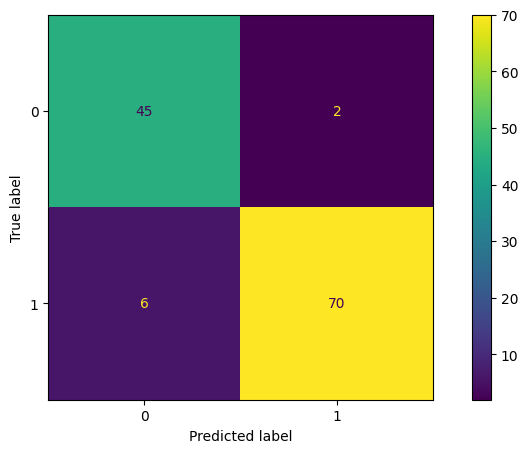

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test_1, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

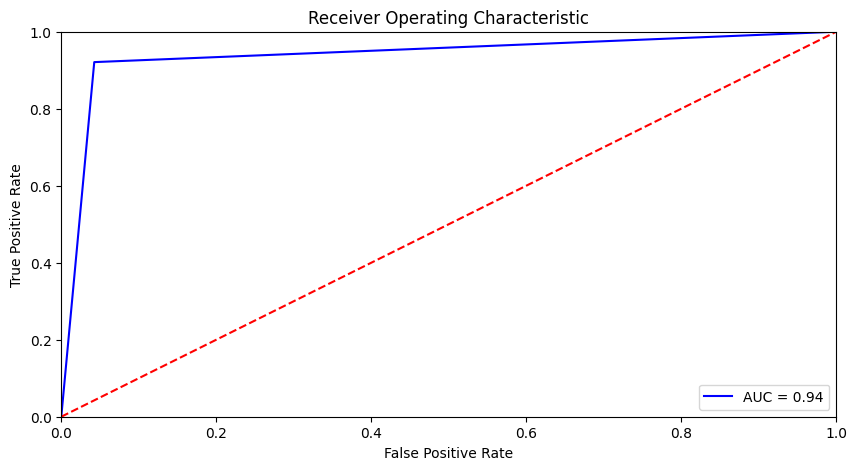

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y_test_1, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
plt.close()

# validación modelo

In [ ]:
mm = StandardScaler()
df_scaler = mm.fit_transform(df_val)
scaler_df = pd.DataFrame(df_scaler, index=df_val.index, columns=df_val.columns)
scaler_df = scaler_df.drop(columns=['Outcome'])
scaler_df

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.413382,0.706232,-0.873615,-0.026829,0.118395,0.898563
1,-1.118563,0.321014,-0.873615,-1.015268,-0.340551,-0.625785
3,-1.021296,0.321014,-0.504869,-0.803460,-0.646515,-1.428073
4,0.145899,-1.348261,-0.214579,1.314624,2.880384,-0.465327
6,-1.288779,-0.706232,-0.528406,-0.393964,-0.511824,-1.026929
8,1.604894,0.577826,1.256484,-0.464566,-0.661481,1.139249
13,1.410362,-0.064203,2.445103,-0.521049,-0.262397,1.620622
14,0.851080,0.706232,-0.187119,-1.128233,0.051881,0.978792
16,-0.316116,1.476667,0.028637,1.695879,-0.007982,-0.625785
18,-0.680864,-1.990290,-0.548020,1.342865,-0.619909,-0.465327


In [ ]:
scaler_df=scaler_df.reset_index(drop=True)

In [ ]:
X = scaler_df.copy()
y = df_val.Outcome

Accuracy de XGBoost:  0.9
Test set score: 0.9048
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.86      0.92         7

    accuracy                           0.90        10
   macro avg       0.88      0.93      0.89        10
weighted avg       0.93      0.90      0.90        10



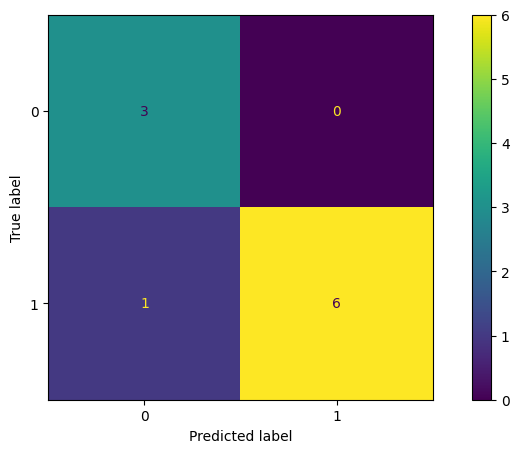

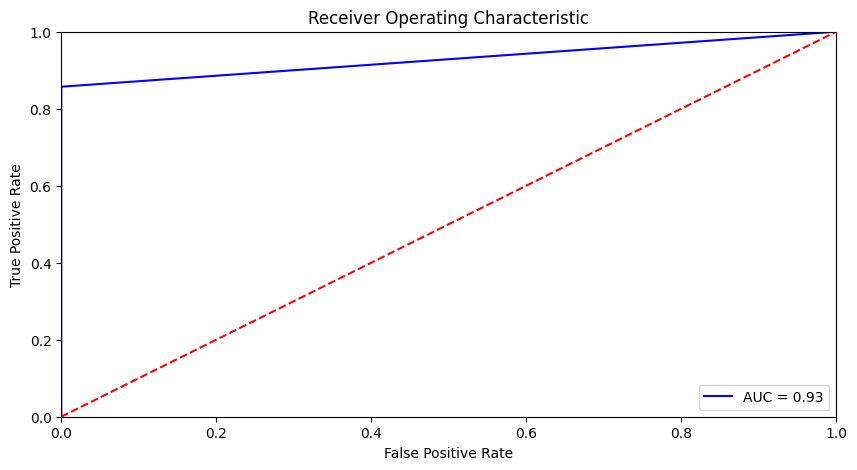

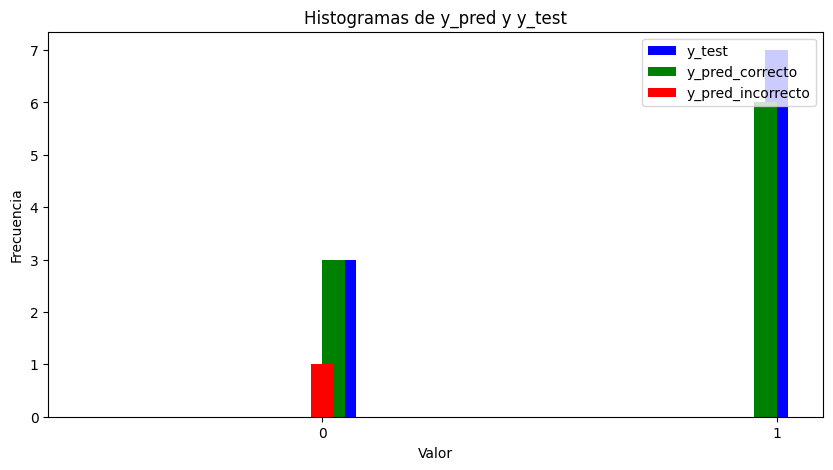

In [ ]:
preds_xgb = random_search.predict(X)


accuracy_xgb = float(np.sum(preds_xgb == y))/y.shape[0]
print('Accuracy de XGBoost: ', accuracy_xgb)


print('Test set score: {:.4f}'.format(random_search.score(X, y)))


clas_report=classification_report(y, preds_xgb)
print(clas_report)


confusion_matrix = metrics.confusion_matrix(y, preds_xgb)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()


fpr, tpr, threshold = metrics.roc_curve(y, preds_xgb)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
plt.close()


# Crear los arreglos booleanos
correcto = (y == preds_xgb)
incorrecto = (y != preds_xgb)

# Crear los arreglos de valores predichos correctamente e incorrectamente
y_pred_correcto = np.extract(correcto, preds_xgb)
y_pred_incorrecto = np.extract(incorrecto, preds_xgb)


# Graficar los histogramas en cada subplot
plt.hist(y, bins=20, color='blue', label='y_test', align='right')
plt.hist(y_pred_correcto, bins=20, color='green', label='y_pred_correcto', align='mid')
plt.hist(y_pred_incorrecto, bins=20, color='red', label='y_pred_incorrecto', align='left')

# Establecer el título y las etiquetas de los ejes
plt.title('Histogramas de y_pred y y_test')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.xticks([0, 1])
# Mostrar el gráfico
plt.show()

In [ ]:
# Obtener las probabilidades de pertenencia a cada clase
y_prob = random_search.predict_proba(X)[:,1]
y_prob[y_prob < 0.2] = 0

clas_report=classification_report(y, preds_xgb)
print(clas_report)

#Crear df con los valores reales y predichos
data_g = {'y_test': y, 'y_pred': preds_xgb, 'y_prob': y_prob}
df_g = pd.DataFrame(data_g)
df_g=df_g.reset_index(drop=True)
indices = df_g.index

goplot(df_g[['y_test','y_pred','y_prob']])

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.86      0.92         7

    accuracy                           0.90        10
   macro avg       0.88      0.93      0.89        10
weighted avg       0.93      0.90      0.90        10



# NN

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(64, input_shape=(6,), activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_1, y_train_1, epochs=50, batch_size=32, validation_data=(X_test_1, y_test_1))


y_pred = (model.predict(X_test_1) > 0.3).astype("int32")
print("Accuracy_test:", accuracy_score(y_test_1, y_pred))

Epoch 1/50
9/9 [==============================] - 2s 49ms/step - loss: 0.5903 - accuracy: 0.7378 - val_loss: 0.4577 - val_accuracy: 0.9106
Epoch 2/50
9/9 [==============================] - 0s 12ms/step - loss: 0.3869 - accuracy: 0.8916 - val_loss: 0.2860 - val_accuracy: 0.8862
Epoch 3/50
9/9 [==============================] - 0s 11ms/step - loss: 0.2430 - accuracy: 0.9161 - val_loss: 0.2402 - val_accuracy: 0.8699
Epoch 4/50
9/9 [==============================] - 0s 16ms/step - loss: 0.1990 - accuracy: 0.9196 - val_loss: 0.2322 - val_accuracy: 0.8699
Epoch 5/50
9/9 [==============================] - 0s 12ms/step - loss: 0.1712 - accuracy: 0.9371 - val_loss: 0.1987 - val_accuracy: 0.9024
Epoch 6/50
9/9 [==============================] - 0s 12ms/step - loss: 0.1368 - accuracy: 0.9476 - val_loss: 0.1992 - val_accuracy: 0.9106
Epoch 7/50
9/9 [==============================] - 0s 13ms/step - loss: 0.1167 - accuracy: 0.9580 - val_loss: 0.1853 - val_accuracy: 0.9106
Epoch 8/50
9/9 [===========

In [ ]:
clas_report=classification_report(y_test_1, y_pred)
print(clas_report)

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        47
           1       1.00      0.91      0.95        76

    accuracy                           0.94       123
   macro avg       0.94      0.95      0.94       123
weighted avg       0.95      0.94      0.94       123



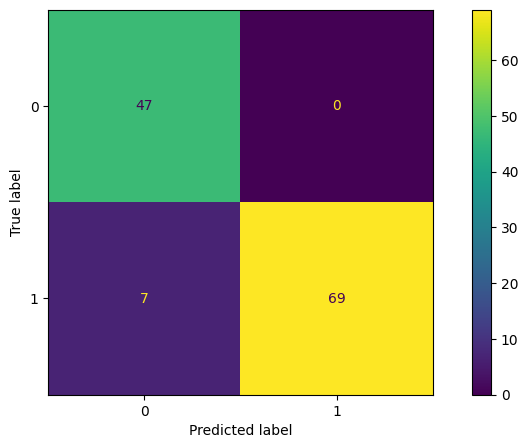

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test_1, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

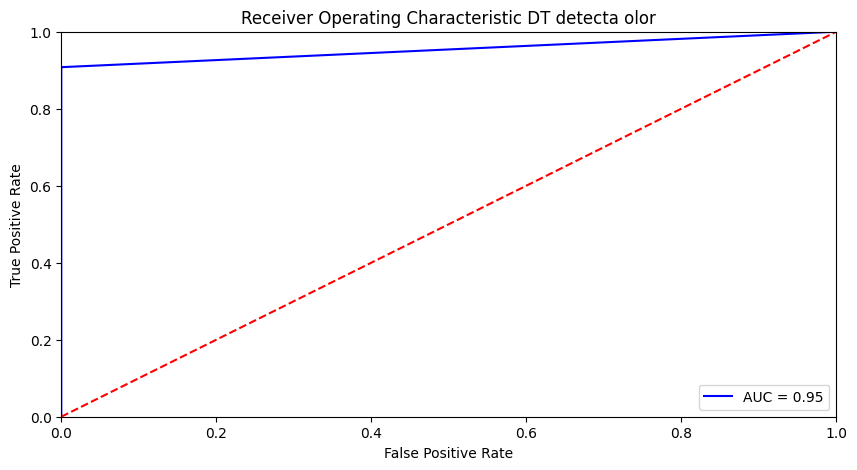

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y_test_1, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic DT detecta olor')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
plt.savefig("roc_xg_DT_PRIMER_MODEL.png")
plt.close()

In [ ]:
f=pd.DataFrame(y_pred, columns=['y_pred'])
y_test_1=y_test_1.reset_index(drop=True)
f['y_test']=y_test_1
f

,y_pred,y_test
0,1,1
1,0,0
2,1,1
3,1,1
4,0,0
...,...,...
118,0,0
119,1,1
120,0,0
121,1,1


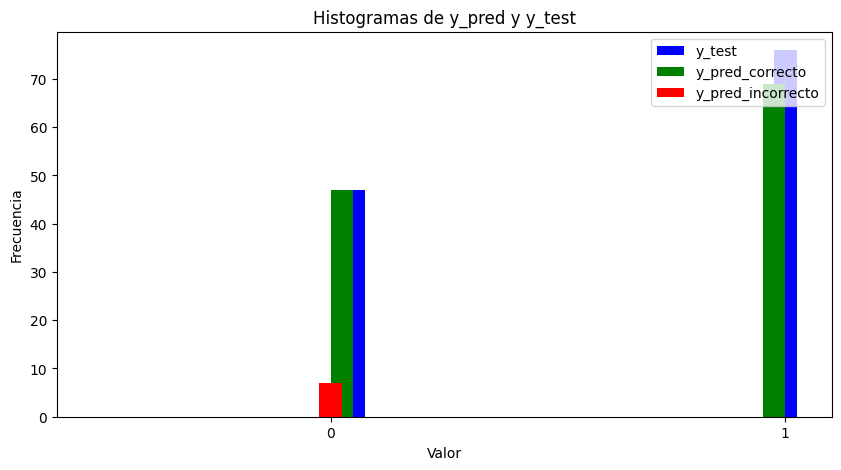

In [ ]:
# Crear los arreglos booleanos
correcto = (f.y_test == f.y_pred)
incorrecto = (f.y_test != f.y_pred)

# Crear los arreglos de valores predichos correctamente e incorrectamente
y_pred_correcto = np.extract(correcto, f.y_pred)
y_pred_incorrecto = np.extract(incorrecto, f.y_pred)


# Graficar los histogramas en cada subplot
plt.hist(y_test_1, bins=20, color='blue', label='y_test', align='right')
plt.hist(y_pred_correcto, bins=20, color='green', label='y_pred_correcto', align='mid')
plt.hist(y_pred_incorrecto, bins=20, color='red', label='y_pred_incorrecto', align='left')

# Establecer el título y las etiquetas de los ejes
plt.title('Histogramas de y_pred y y_test')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.xticks([0, 1])
# Mostrar el gráfico
plt.show()

# validación modelo

In [ ]:
mm = StandardScaler()
df_scaler = mm.fit_transform(df_val)
scaler_df = pd.DataFrame(df_scaler, index=df_val.index, columns=df_val.columns)
scaler_df = scaler_df.drop(columns=['Outcome'])
scaler_df

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.413382,0.706232,-0.873615,-0.026829,0.118395,0.898563
1,-1.118563,0.321014,-0.873615,-1.015268,-0.340551,-0.625785
3,-1.021296,0.321014,-0.504869,-0.803460,-0.646515,-1.428073
4,0.145899,-1.348261,-0.214579,1.314624,2.880384,-0.465327
6,-1.288779,-0.706232,-0.528406,-0.393964,-0.511824,-1.026929
8,1.604894,0.577826,1.256484,-0.464566,-0.661481,1.139249
13,1.410362,-0.064203,2.445103,-0.521049,-0.262397,1.620622
14,0.851080,0.706232,-0.187119,-1.128233,0.051881,0.978792
16,-0.316116,1.476667,0.028637,1.695879,-0.007982,-0.625785
18,-0.680864,-1.990290,-0.548020,1.342865,-0.619909,-0.465327


In [ ]:
scaler_df=scaler_df.reset_index(drop=True)

In [ ]:
X = scaler_df.copy()
y = df_val.Outcome

In [ ]:
y_pred = (model.predict(X) > 0.3).astype("int32")
print("Accuracy_test:", accuracy_score(y, y_pred))

1/1 [==============================] - 0s 29ms/step
Accuracy_test: 0.8


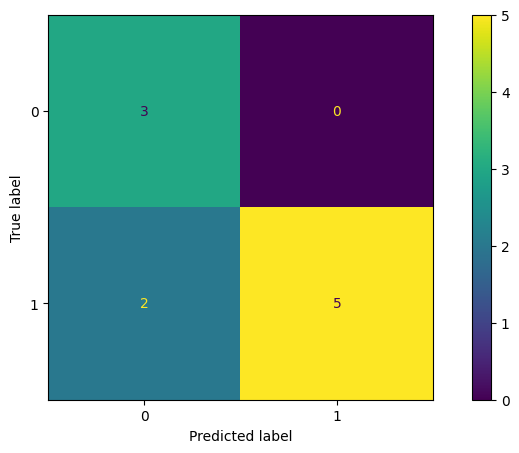

In [ ]:
confusion_matrix = metrics.confusion_matrix(y, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

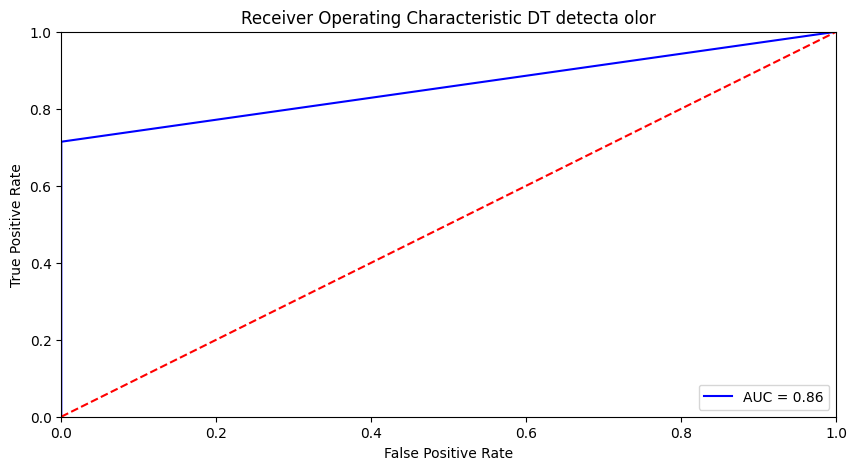

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic DT detecta olor')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
plt.savefig("roc_xg_DT_PRIMER_MODEL.png")
plt.close()

In [ ]:
f=pd.DataFrame(y_pred, columns=['y_pred'])
y=y.reset_index(drop=True)
f['y_test']=y
f

,y_pred,y_test
0,1,1
1,0,0
2,0,0
3,1,1
4,0,1
5,1,1
6,1,1
7,1,1
8,0,1
9,0,0


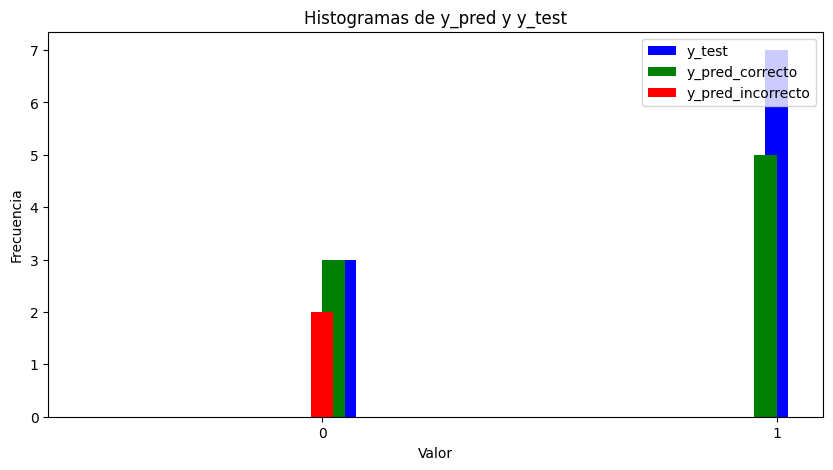

In [ ]:
# Crear los arreglos booleanos
correcto = (f.y_test == f.y_pred)
incorrecto = (f.y_test != f.y_pred)

# Crear los arreglos de valores predichos correctamente e incorrectamente
y_pred_correcto = np.extract(correcto, f.y_pred)
y_pred_incorrecto = np.extract(incorrecto, f.y_pred)


# Graficar los histogramas en cada subplot
plt.hist(y, bins=20, color='blue', label='y_test', align='right')
plt.hist(y_pred_correcto, bins=20, color='green', label='y_pred_correcto', align='mid')
plt.hist(y_pred_incorrecto, bins=20, color='red', label='y_pred_incorrecto', align='left')

# Establecer el título y las etiquetas de los ejes
plt.title('Histogramas de y_pred y y_test')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.xticks([0, 1])
# Mostrar el gráfico
plt.show()

In [ ]:
clas_report=classification_report(y, y_pred)
print(clas_report)

              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.71      0.83         7

    accuracy                           0.80        10
   macro avg       0.80      0.86      0.79        10
weighted avg       0.88      0.80      0.81        10

